# Depth Colorizer

Used to colorize a 16bit depth image.

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
depth = cv2.imread(os.path.join('Images', 'depth.png'), cv2.IMREAD_ANYDEPTH)

In [3]:
print(depth.dtype)

uint16


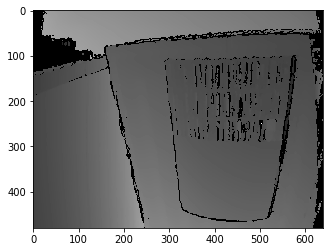

In [4]:
%matplotlib inline
plt.imshow(depth, cmap="gray")
plt.show()

equalizeHist()


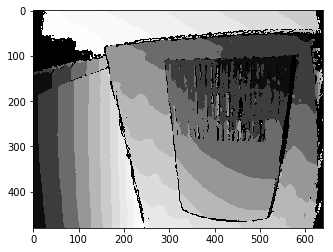

normalize()


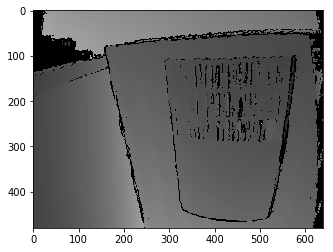

In [9]:
depth_8 = (depth/256.0).astype(np.uint8)
color = cv2.equalizeHist(depth_8)
color_n = np.zeros(depth.shape, np.uint16)
color_n = cv2.normalize(depth, color_n, 0, 65535, cv2.NORM_MINMAX)
color_r = 255 - depth_8
color_real = cv2.equalizeHist(color_r)
%matplotlib inline
print('equalizeHist()')
plt.imshow(color, cmap="gray")
plt.show()
print('normalize()')
plt.imshow(color_n, cmap="gray")
plt.show()

No equalization


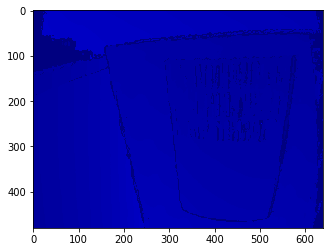

Equalization


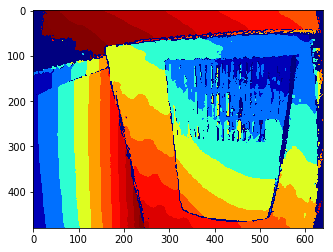

Equalization equivalent to RealSense Viewer's Jet function


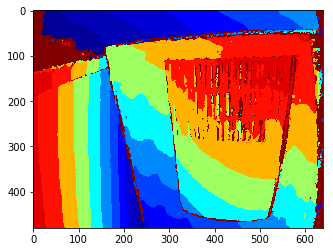

16 bit with normalization


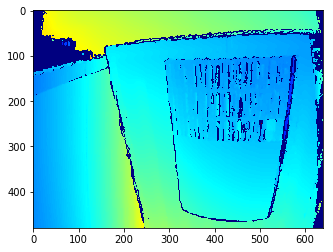

In [10]:
color_depth_no_equ = cv2.applyColorMap(depth_8, 2)
color_depth = cv2.applyColorMap(color, 2)
color_norm = (color_n/256).astype(np.uint8)
color_normalization = cv2.applyColorMap(color_norm, 2)
# if colorization should look like in RealSense Viewer
color_realsense = cv2.applyColorMap(color_real, 2)
%matplotlib inline
print('No equalization')
plt.imshow(cv2.cvtColor(color_depth_no_equ, cv2.COLOR_BGR2RGB))
plt.show()
print('Equalization')
plt.imshow(cv2.cvtColor(color_depth, cv2.COLOR_BGR2RGB))
plt.show()
print("Equalization equivalent to RealSense Viewer's Jet function")
plt.imshow(cv2.cvtColor(color_realsense, cv2.COLOR_BGR2RGB))
plt.show()
print("16 bit with normalization")
plt.imshow(cv2.cvtColor(color_normalization, cv2.COLOR_BGR2RGB))
plt.show()